In [1]:
import numpy as np
import pandas as pd
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('UberDataset.csv')
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [3]:
len(df[df.duplicated()])

1

In [4]:
df.drop_duplicates(keep='first',inplace=True)

In [5]:
len(df[df.duplicated()])

0

In [6]:
df.shape

(1155, 7)

In [7]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [10]:
list(df.columns)

['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

In [11]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],format = '%m-%d-%Y %H:%M',errors='coerce')
df['START_DATE']=pd.to_datetime(df['START_DATE'],format = '%m/%d/%Y %H:%M',errors='coerce')

df['END_DATE']=pd.to_datetime(df['END_DATE'],format = '%m-%d-%Y %H:%M',errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],format = '%m/%d/%Y %H:%M',errors='coerce')

In [12]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [13]:
df.shape

(1155, 7)

In [14]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [16]:
dayofweek=[]
weekday=[]

for d in df['START_DATE']:
    if not pd.isna(d):
        dayofweek.append(int(d.dayofweek))
        weekday.append(calendar.day_name[dayofweek[-1]])
    else:
        dayofweek.append(None)
        weekday.append(None)

df['Day of week']=weekday

In [17]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Day of week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday


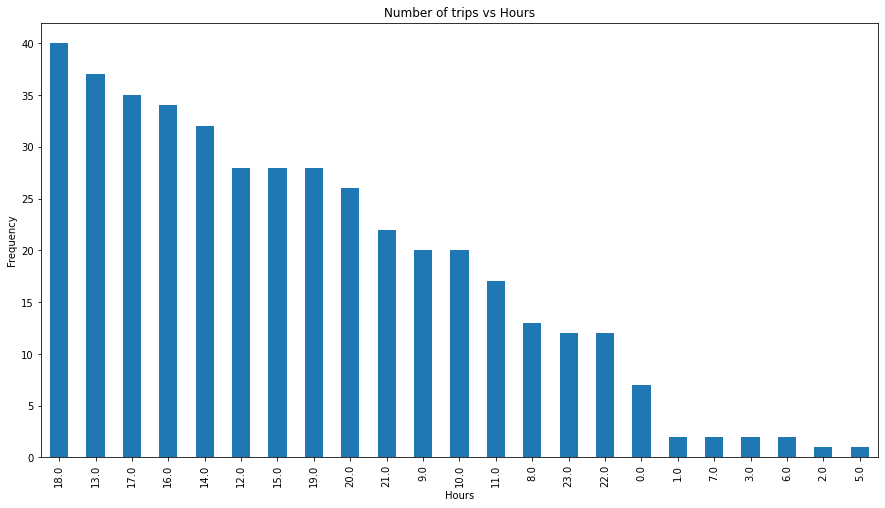

In [18]:
hours=df['START_DATE'].dt.hour.value_counts()
hours.plot(kind='bar',figsize=(15,8))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs Hours')
plt.show()

So at around 18 hours(6 PM) in the evening most Uber were booked.

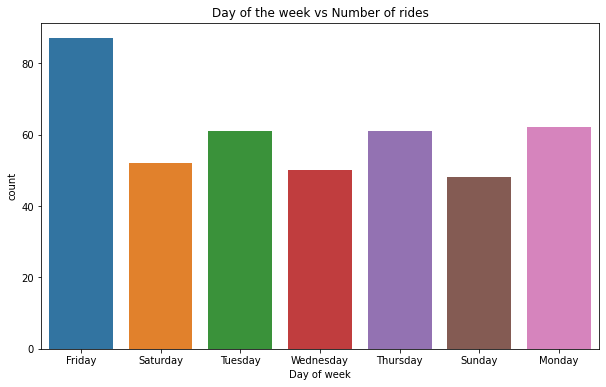

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Day of week')
plt.title('Day of the week vs Number of rides')
plt.show()

So, Friday(start of the weekend) is the day when most Ubers were booked.

In [20]:
df['PURPOSE'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

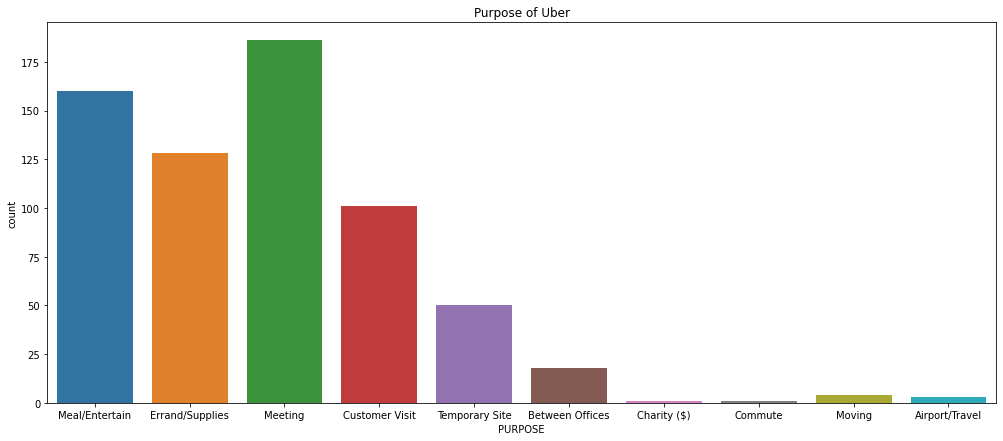

In [21]:
plt.figure(figsize=(17,7))
sns.countplot(data=df,x='PURPOSE')
plt.title('Purpose of Uber')
plt.show()

Uber were booked mostly for meeting purpose.

In [22]:
df['CATEGORY'].value_counts()

Business    1077
Personal      77
Name: CATEGORY, dtype: int64

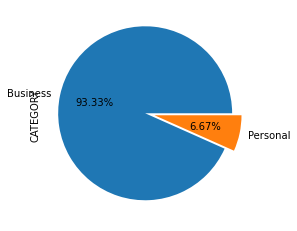

In [23]:
df['CATEGORY'].value_counts().plot(kind='pie',labels=['Business','Personal'], autopct='%1.2f%%',explode=[0.1,0.01])
plt.show()

In [24]:
df['START'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [25]:
top_20_starting_point=df['START'].value_counts().head(20).index.tolist()
top_20_starting_point

['Cary',
 'Unknown Location',
 'Morrisville',
 'Whitebridge',
 'Islamabad',
 'Lahore',
 'Durham',
 'Raleigh',
 'Kar?chi',
 'Westpark Place',
 'Apex',
 'Berkeley',
 'Midtown',
 'Kenner',
 'Kissimmee',
 'R?walpindi',
 'New Orleans',
 'Emeryville',
 'Downtown',
 'Edgehill Farms']

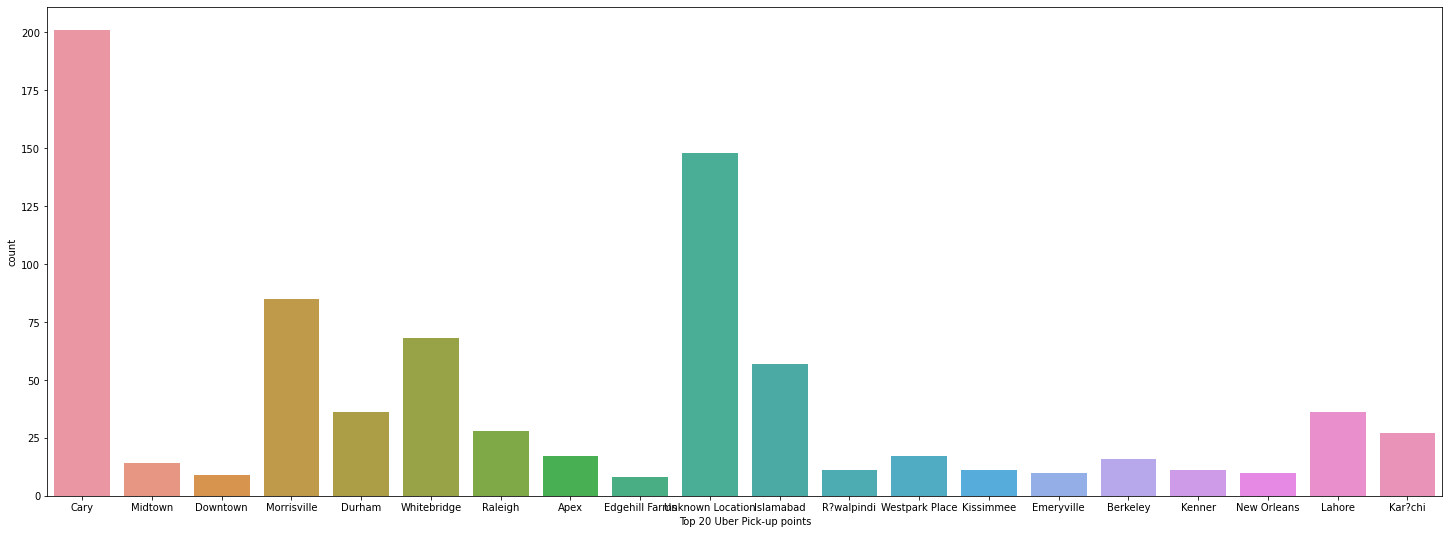

In [26]:
df1=df[df['START'].isin(top_20_starting_point)]
plt.figure(figsize=(25,9))
sns.countplot(data=df1,x='START')
plt.xlabel('Top 20 Uber Pick-up points')
plt.show()

In [27]:
top_20_ending_point=df['STOP'].value_counts().head(20).index.tolist()
top_20_ending_point

['Cary',
 'Unknown Location',
 'Morrisville',
 'Whitebridge',
 'Islamabad',
 'Durham',
 'Lahore',
 'Raleigh',
 'Kar?chi',
 'Apex',
 'Berkeley',
 'Westpark Place',
 'R?walpindi',
 'Kissimmee',
 'Midtown',
 'Edgehill Farms',
 'New Orleans',
 'Kenner',
 'Emeryville',
 'Central']

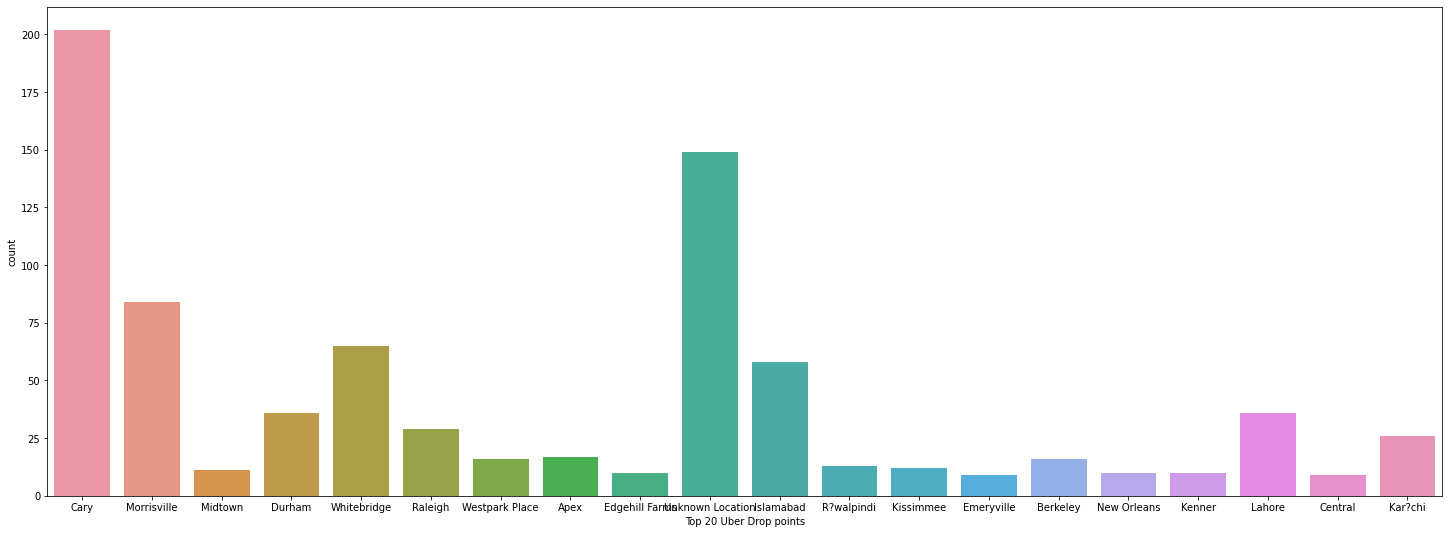

In [28]:
df2=df[df['STOP'].isin(top_20_ending_point)]
plt.figure(figsize=(25,9))
sns.countplot(data=df2,x='STOP')
plt.xlabel('Top 20 Uber Drop points')
plt.show()

In [29]:
df.head(4)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Day of week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday


<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

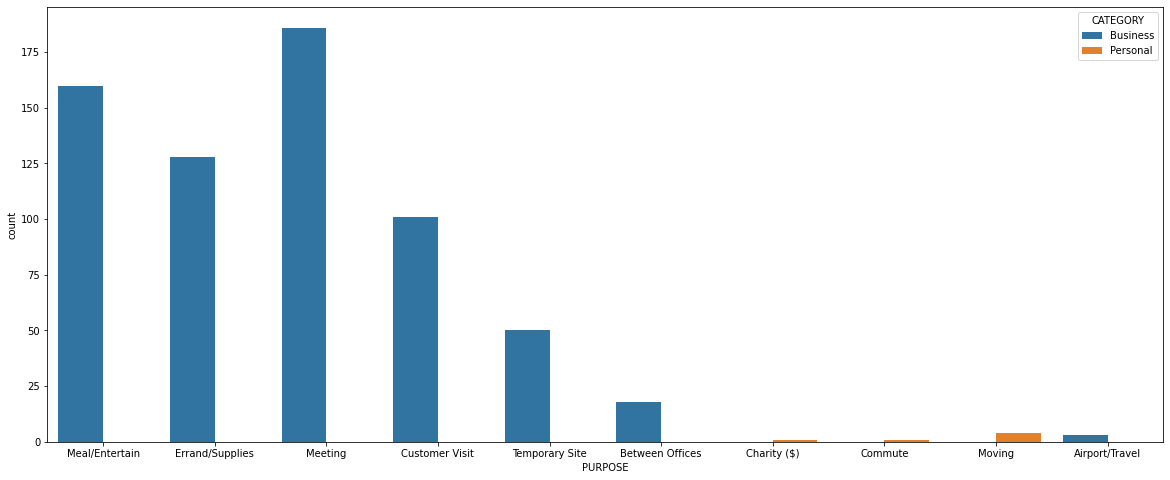

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY')

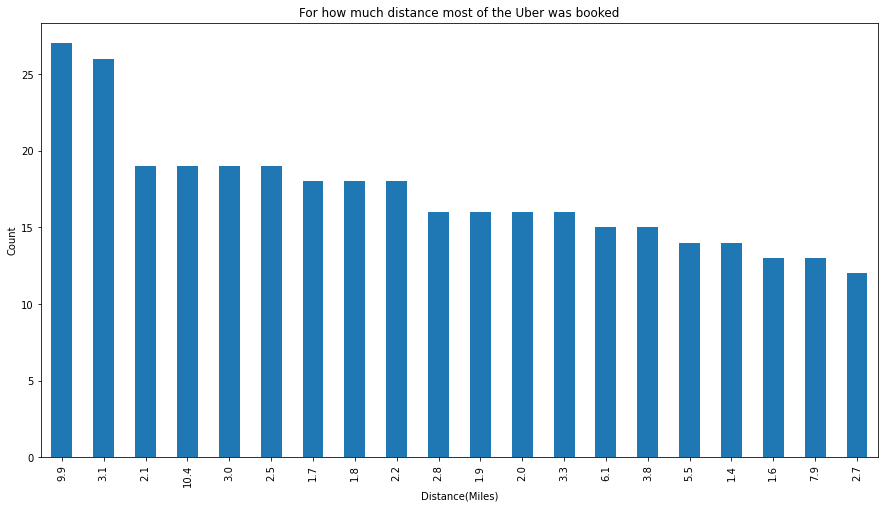

In [35]:
plt.figure(figsize=(15,8))
df['MILES'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Distance(Miles)')
plt.ylabel('Count')
plt.title('For how much distance most of the Uber was booked')
plt.show()